# Figure 1. Loss of TDP-43 leads to widespread alternative polyadenylation changes

## Load libraries and functions

In [1]:
shhh <- suppressPackageStartupMessages

In [2]:
library(data.table)
library(ggplot2)
library(stringr)
shhh(library(dplyr))
library(tidyplots)

In [3]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)

## Figure 1A. The scheme of APA analysis

Generated in illustrator

## Figure 1B. The loss of TDP-43 is associated with altered APA

In [4]:
liu_apalyzer_3utr = fread("Fig_1b_liu_3utr_apalyzer_for_plotting.csv")

In [5]:
## options(repr.plot.width = 12, repr.plot.height = 12)
fig1b = ggplot(liu_apalyzer_3utr, 
       aes(RED, 
           -log10(padj), color = APAreg)) + 
    geom_point(size = 0.25, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_label_repel(aes(label = ifelse(APAreg != "NC", gene_symbol, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 20) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3")) +
    labs(x = "log2(Fold change)",
         y = "log10(p adjusted)") + 
    theme_classic(base_size = 8)

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


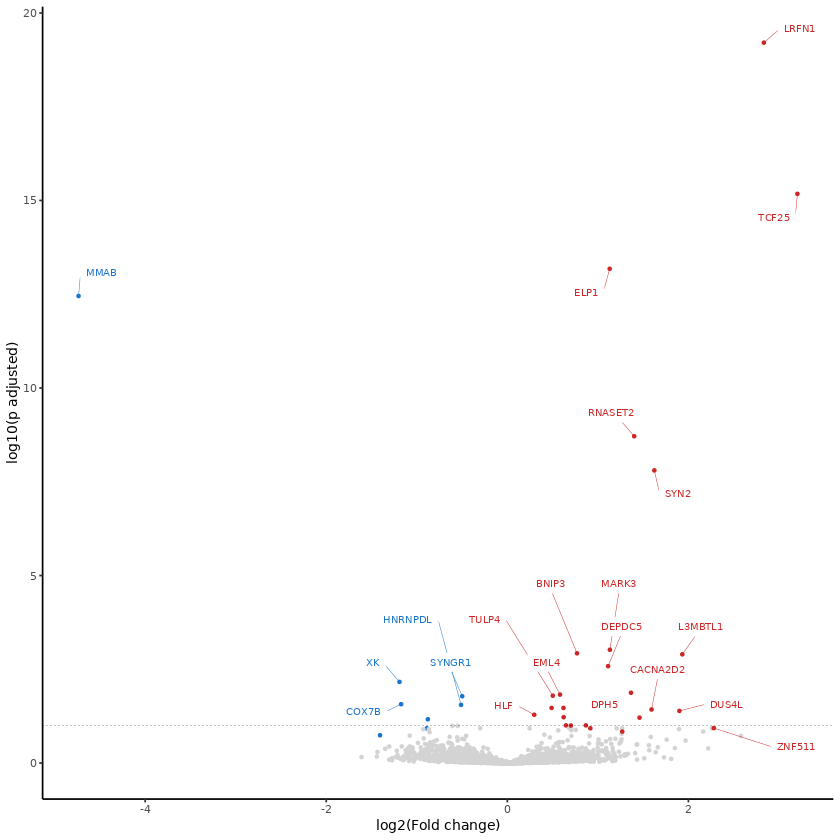

In [6]:
fig1b

In [7]:
ggsave(fig1b, file = "fig_1b.pdf", width = 3, height = 3, units = "in", dpi = 300)

Warning message:
“ggrepel: 26 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


## Figure 1C

In [8]:
TDP43KD_WB = fread("Fig_1c_TDP43-7d-KD_TDP-43-WB-quantitation.csv")

In [9]:
TDP43KD_WB[, Sample := ifelse(Sample == "Scramble", "Control", "TDP-43 KD")]

✔ save_plot: saved to fig_1c_TDP43-7D-KD-TDP-43-WB-quantitation-plot.pdf



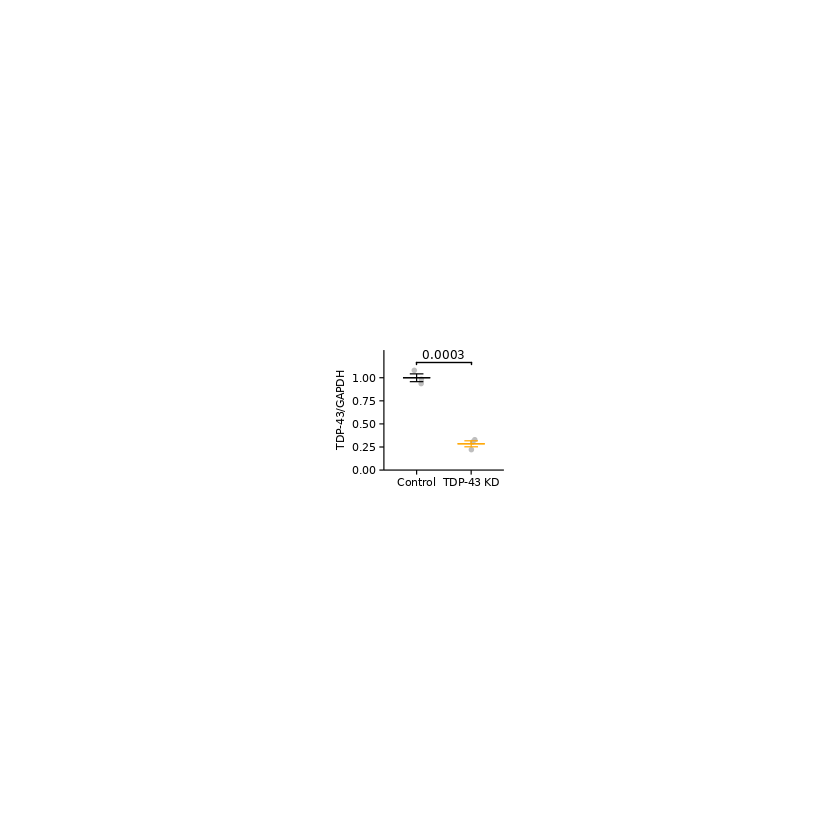

In [10]:
TDP43KD_WB |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE) |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "TDP-43/GAPDH", limits = c(0, 1.3), breaks = c(0, 0.25, 0.5, 0.75, 1) ) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_1c_TDP43-7D-KD-TDP-43-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

## Figure 1D

In [11]:
tdp43kd_7d_apalyzer_3utr = fread("Fig_1d_TDP43-7d-KD_RNAseq_3utr_apalyzer_for_plotting.csv")

In [12]:
tdp43kd_7d_apalyzer_3utr$APAreg2 = factor(tdp43kd_7d_apalyzer_3utr$APAreg2, levels= c("proximal", "NC", "distal"))

In [13]:
fig1d = ggplot(tdp43kd_7d_apalyzer_3utr, 
       aes(RED, 
           -log10(padj), color = APAreg2)) + 
    geom_point(size = 0.25, show.legend = F) +
    geom_hline(yintercept  = -log10(0.1), linewidth = 0.1, linetype = "dotted") +
    ggrepel::geom_label_repel(aes(label = ifelse(gene_label != "no", gene_symbol, "")),
                             show.legend = F, 
                             box.padding = 0.5, 
                             label.padding = 0.25,
                             #nudge_x = -0.1, 
                             #nudge_y = 0.1,
                             label.size = NA,
                             size =2,
                             segment.size = 0.1,
                             max.overlaps = 20) +
    scale_color_manual(values = c("dodgerblue3","lightgray", "firebrick3")) +
    labs(x = "Delta-PUI",
         y = "-log10(p adjusted)") + 
    theme_classic(base_size = 6)

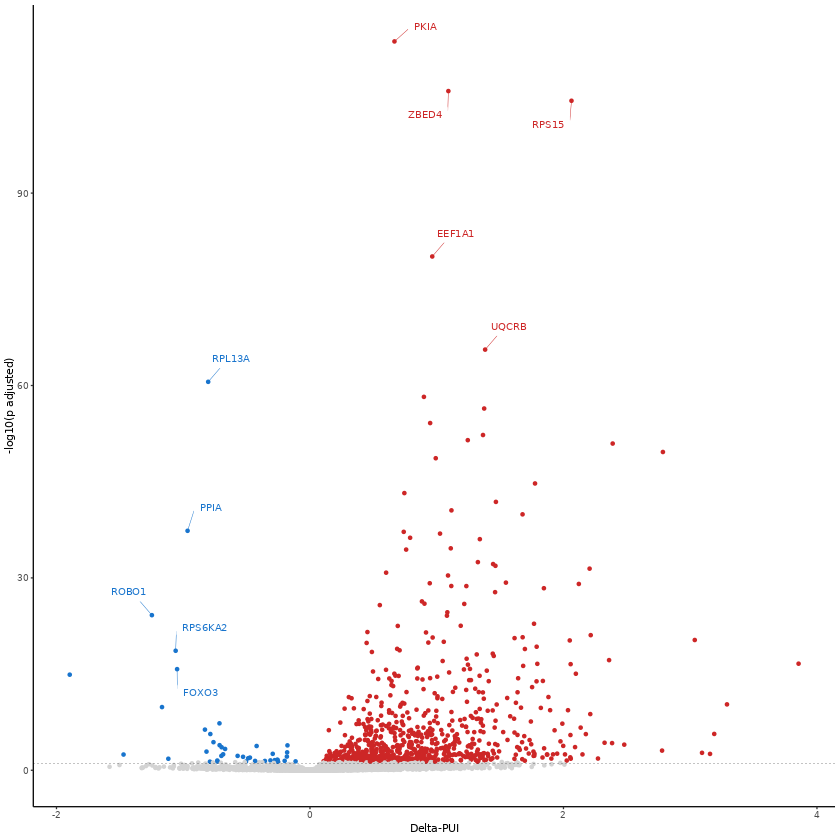

In [14]:
fig1d

In [15]:
ggsave(fig1d, file = "fig_1d.pdf", width = 3, height = 3, units = "in", dpi = 300)

In [16]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Cairo_1.6-2       tidyplots_0.2.2   dplyr_1.1.4       stringr_1.5.1    
[5] ggplot2_3.5.0     data.table_1.15.2

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-11     tidyselect_1.2.1  repr_1.1.6        purrr_1.0.2      
 [5] carData_3.0-5     colorspace_2.1-0  vctrs_0.6.5 